In [2]:
# 1. Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.
# 2. Вивести перші 5 рядків датасету.
import pandas as pd

df = pd.read_csv('museum_visitors.csv')

print(df.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [3]:
# 3. Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків
print("Розмір датасету:", df.shape)

print("Типи даних та кількість пропусків:")
print(df.info())

Розмір датасету: (59, 5)
Типи даних та кількість пропусків:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  59 non-null     object
 1   Avila Adobe                           59 non-null     int64 
 2   Firehouse Museum                      59 non-null     int64 
 3   Chinese American Museum               59 non-null     int64 
 4   America Tropical Interpretive Center  59 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB
None


In [4]:
# 4. Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).
print("Кількість дублікатів до видалення:", df.duplicated().sum())

df = df.drop_duplicates()
print("Розмір таблиці після видалення дублікатів:", df.shape)

Кількість дублікатів до видалення: 0
Розмір таблиці після видалення дублікатів: (59, 5)


In [9]:
# 5. Про які роки містить інформацію датасет.

df['Date'] = pd.to_datetime(df['Date'])

years = df['Date'].dt.year.unique()

print("Інформація про роки в датасеті:", years)

Інформація про роки в датасеті: [2014 2015 2016 2017 2018]


In [10]:
# 6. Змінити назви столбців. Замінити великі букви на маленьки, 
# пробіли на підкреслення (date, avila_adobe, firehouse_museum, 
# chinese_american_museum, america_tropical_interpretive_center).

df.columns = df.columns.str.lower().str.replace(' ', '_')
print("Назви стовбців після зміни:")
print(df.columns)

Назви стовбців після зміни:
Index(['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum',
       'america_tropical_interpretive_center'],
      dtype='object')


In [11]:
# 7. Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.
average_visitors = df.mean(numeric_only=True)
print("Середня кількість відвідувачів для кожного музею:")
print(average_visitors)

Середня кількість відвідувачів для кожного музею:
avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
dtype: float64


In [12]:
# 8. Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік
min_visitors_2018 = df[df['date'].dt.year == 2018].min(numeric_only=True)
max_visitors_2018 = df[df['date'].dt.year == 2018].max(numeric_only=True)

print("Мінімальна кількість відвідувачів у 2018 році:")
print(min_visitors_2018)
print("Максимальна кількість відвідувачів у 2018 році:")
print(max_visitors_2018)

Мінімальна кількість відвідувачів у 2018 році:
avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64
Максимальна кількість відвідувачів у 2018 році:
avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


In [27]:
# 9. Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).
# df['date'] = pd.to_datetime(df['date'])

import calendar

monthly_visitors_2015 = df_2015.groupby('month').agg({
    'avila_adobe': 'sum',
    'firehouse_museum': 'sum',
    'chinese_american_museum': 'sum',
    'america_tropical_interpretive_center': 'sum'
})

# Знаходження місяців з найвищою і найнижчою кількістю відвідувачів для кожного музею
highest_months = monthly_visitors_2015.idxmax()
lowest_months = monthly_visitors_2015.idxmin()

#print("Місяці з найвищою кількістю відвідувачів у 2015 році для кожного музею:")
#print(highest_months)
#print("Місяці з найнижчою кількістю відвідувачів у 2015 році для кожного музею:")
#print(lowest_months)

def get_month_name(month_number):
    return calendar.month_name[month_number]

# Виведення результатів з назвами місяців
print("Місяці з найвищою кількістю відвідувачів у 2015 році для кожного музею:")
for museum, month_number in highest_months.items():
    print(f"{museum}: {get_month_name(month_number)}")
print("-------------")
print("Місяці з найнижчою кількістю відвідувачів у 2015 році для кожного музею:")
for museum, month_number in lowest_months.items():
    print(f"{museum}: {get_month_name(month_number)}")

Місяці з найвищою кількістю відвідувачів у 2015 році для кожного музею:
avila_adobe: July
firehouse_museum: May
chinese_american_museum: May
america_tropical_interpretive_center: May
-------------
Місяці з найнижчою кількістю відвідувачів у 2015 році для кожного музею:
avila_adobe: February
firehouse_museum: February
chinese_american_museum: September
america_tropical_interpretive_center: February


In [29]:
# 10. Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

summer_visitors = df[(df['date'].dt.year == 2018) & (df['date'].dt.month.isin([6, 7, 8]))]['avila_adobe'].mean()
winter_visitors = df[(df['date'].dt.year == 2018) & (df['date'].dt.month.isin([12, 1, 2]))]['avila_adobe'].mean()

print("Середня кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року:", summer_visitors)
print("Середня кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року:", winter_visitors)

Середня кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року: 22040.666666666668
Середня кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року: 15491.5


In [31]:
# 11. Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

df_2016 = df[df['date'].dt.year == 2016]

correlation_2016 = df_2016[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].corr()

print("Кореляція у 2016 році:")
print(correlation_2016)

Кореляція у 2016 році:
                                      avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chinese_american_museum                                         

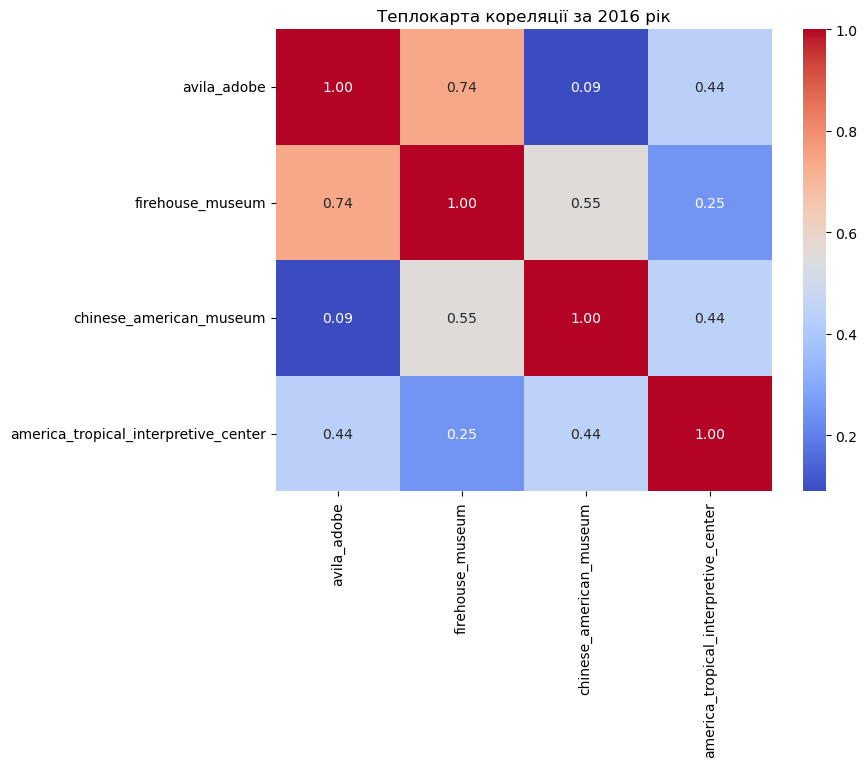

In [33]:
# Візуалізація даних

# 12. Побудувати теплокарту кореляції для попереднього завдання.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_2016, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Теплокарта кореляції за 2016 рік")
plt.show()

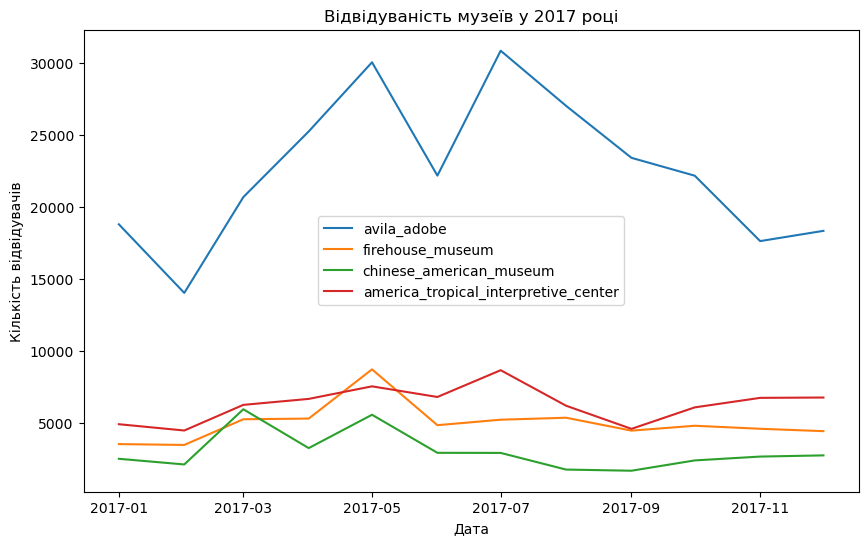

In [35]:
# 13. Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

df_2017 = df[df['date'].dt.year == 2017]

plt.figure(figsize=(10, 6))
for museum in ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']:
    plt.plot(df_2017['date'], df_2017[museum], label=museum)

plt.xlabel("Дата")
plt.ylabel("Кількість відвідувачів")
plt.title("Відвідуваність музеїв у 2017 році")
plt.legend()
plt.show()

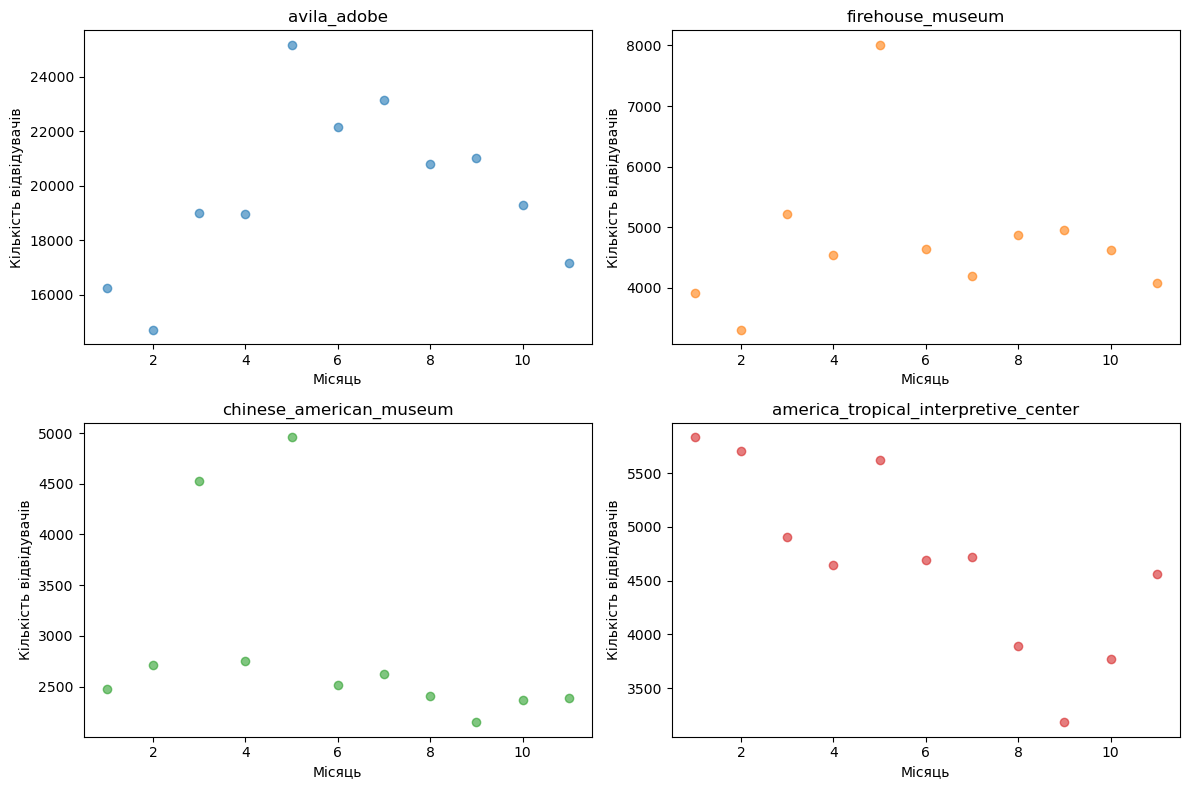

In [41]:
# 14. Побудувати графіки розсіювання для кожного музею за 2018 рік

df_2018 = df[df['date'].dt.year == 2018]

plt.figure(figsize=(12, 8))
for idx, museum in enumerate(['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']):
    plt.subplot(2, 2, idx+1)
    plt.scatter(df_2018['date'].dt.month, df_2018[museum], color='C{}'.format(idx), alpha=0.6)
    plt.xlabel("Місяць")
    plt.ylabel("Кількість відвідувачів")
    plt.title(museum)
plt.tight_layout()
plt.show()

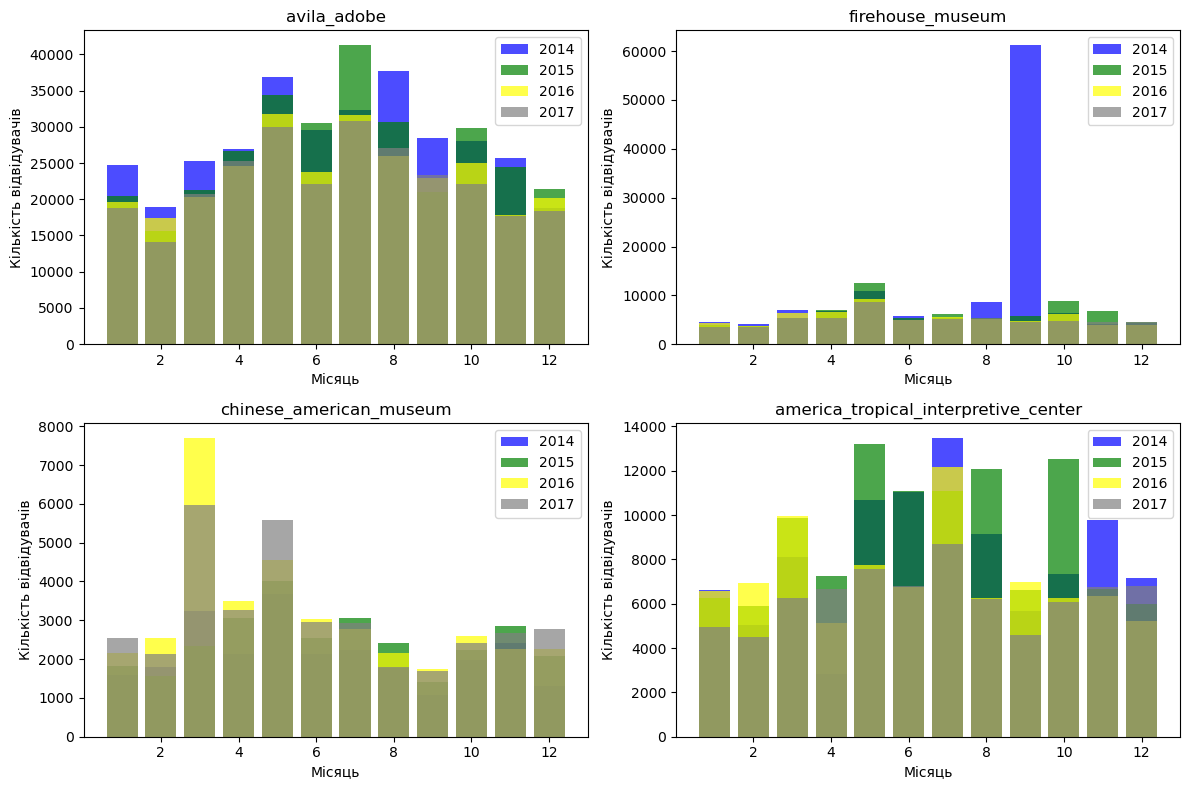

In [42]:
# 15. Гістограма відвідуваності за місяцями кожного музею.
# Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, 
# колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

numeric_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
df[numeric_columns] = df[numeric_columns].fillna(0)

# Групування та обчислення суми
monthly_visitors_by_year = df.groupby([df['date'].dt.year, df['date'].dt.month])[numeric_columns].sum()

# Побудова гістограм
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'yellow', 'grey']
for idx, museum in enumerate(numeric_columns):
    plt.subplot(2, 2, idx+1)
    for year, color in zip(monthly_visitors_by_year.index.get_level_values(0).unique(), colors):
        data = monthly_visitors_by_year.loc[year, museum]
        plt.bar(data.index, data.values, color=color, alpha=0.7, label=str(year))
    plt.xlabel("Місяць")
    plt.ylabel("Кількість відвідувачів")
    plt.title(museum)
    plt.legend()

plt.tight_layout()
plt.show()